# Results - ENEM dataset

Exam codes:

## CH - Humanities
## CN - Natural Sciences
## MT - Math
## LC - Languages


In [1]:
# jupyter nbconvert --no-input --to pdf enem-variance.ipynb
palette = ["red", "purple", "blue", "green"]

dic_exam_to_paper_name = {'CH': 'Humanities', 'MT': 'Math', 'CN': 'Natural Sciences', 'LC': 'Languages' }


In [2]:
from read_functions import read_human_data
from read_functions import read_llm_data

filepath = "C:/Users/pedro/Downloads/TRI/test_responses_llms/EXP"


dic_human_scores, dic_human_itens, dic_average_human_thetas_df = read_human_data()
dic_scores, dic_random_scores, dic_itens, dic_logs, dic_test_responses, dic_average_theta_by_ctt_score, dic_average_theta_by_ctt_random_score = read_llm_data(filepath)



Loading... CH 2022 mistral simple-zero-shot
Loading... CH 2020 mistral paper-nunes-2023-zero-shot
Loading... CH 2021 mistral paper-nunes-2023-zero-shot
Loading... CH 2022 mistral paper-nunes-2023-zero-shot
Loading... MT 2020 mistral simple-zero-shot
Loading... MT 2021 mistral simple-zero-shot
Loading... MT 2022 mistral simple-zero-shot
Loading... CN 2021 mistral simple-zero-shot
Loading... CN 2022 mistral simple-zero-shot
Loading... LC 2021 mistral simple-zero-shot
Loading... LC 2022 mistral simple-zero-shot
Loading... CH 2020 llama2 simple-zero-shot
Loading... CH 2021 llama2 simple-zero-shot


In [6]:
# CTT SCORES - CH
import matplotlib.pyplot as plt
import seaborn as sns

for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        curves = {}
        for year in dic_scores[llm][exam].keys():
            print(llm, exam, year)
            # curves['random'] = dic_random_scores[llm][exam][year]['CTT_SCORE'] / 45
            curves[f'{year}'] = dic_scores[llm][exam][year]['CTT_SCORE'] / 45

        g = sns.kdeplot(
            curves,
            bw_adjust=2,
            common_norm=False,  # Normalize each distribution independently
            palette=palette,  # Use palette for multiple colors
        )
        plt.title(f"{dic_exam_to_paper_name[exam]}")
        plt.xlabel(f"Accuracy", fontsize=14)
        plt.ylabel("Density", fontsize=14)
        plt.show()
        plt.savefig(f'figures/dist-{llm}-{exam}-ctt-scores.pdf', format='pdf',bbox_inches='tight')

mistral CH simple-zero-shot


KeyError: 'CTT_SCORE'

C:\Users\pedro\AppData\Local\Temp\ipykernel_560\371188463.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.kdeplot(
C:\Users\pedro\AppData\Local\Temp\ipykernel_560\371188463.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(


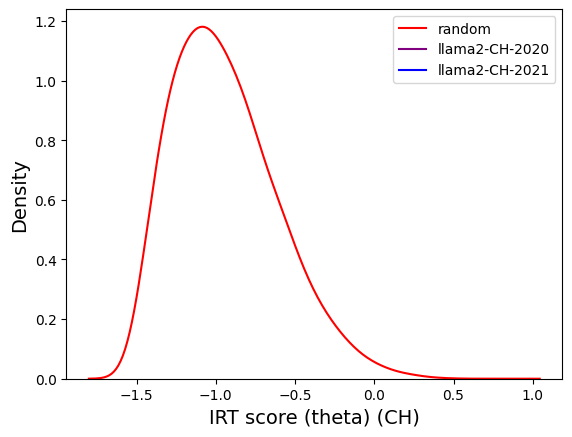

<Figure size 640x480 with 0 Axes>

In [5]:
# CTT SCORES - CH
import matplotlib.pyplot as plt
import seaborn as sns

for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        curves = {}
        for year in dic_scores[llm][exam].keys():
            curves['random'] = dic_random_scores[llm][exam][year]['IRT_SCORE']
            curves[f'{llm}-{exam}-{year}'] = dic_scores[llm][exam][year]['IRT_SCORE']

        g = sns.kdeplot(
            curves,
            bw_adjust=2.1,
            common_norm=False,  # Normalize each distribution independently
            palette=palette,  # Use palette for multiple colors
        )
        plt.xlabel(f"IRT score (theta) ({exam})", fontsize=14)
        plt.ylabel("Density", fontsize=14)
        plt.show()
        plt.savefig(f'figures/dist-ch-ctt-scores.pdf', format='pdf',bbox_inches='tight')

llama2 CH


C:\Users\pedro\AppData\Local\Temp\ipykernel_560\3526799247.py:13: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.kdeplot(


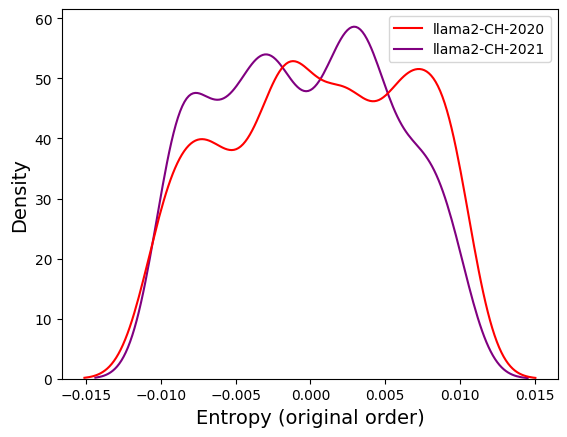

<Figure size 640x480 with 0 Axes>

In [6]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns


for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        curves = {}
        print(llm, exam)
        for year in dic_scores[llm][exam].keys():
            curves[f'{llm}-{exam}-{year}'] = dic_itens[llm][exam][year]['entropy_original_order']

        g = sns.kdeplot(
            curves,
            bw_adjust=0.6,
            common_norm=False,  # Normalize each distribution independently
            palette=palette,  # Use palette for multiple colors
        )
        plt.xlabel("Entropy (original order)", fontsize=14)
        plt.ylabel("Density", fontsize=14)
        plt.show()
        plt.savefig(f'figures/dist-{exam}-{llm}-original-entropy-scores.pdf', format='pdf',bbox_inches='tight')

llama2 CH


C:\Users\pedro\AppData\Local\Temp\ipykernel_560\4259430781.py:13: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.kdeplot(


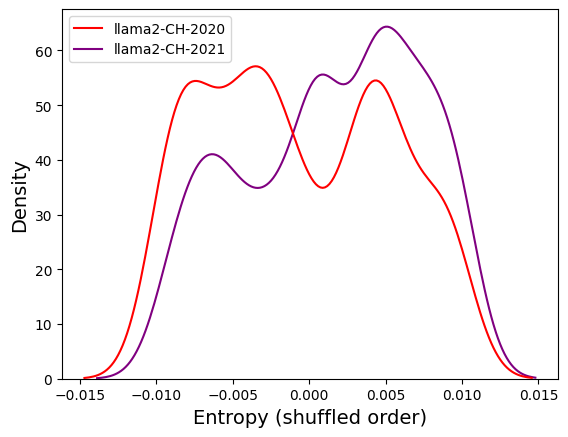

<Figure size 640x480 with 0 Axes>

In [7]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns


for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        curves = {}
        print(llm, exam)
        for year in dic_scores[llm][exam].keys():
            curves[f'{llm}-{exam}-{year}'] = dic_itens[llm][exam][year]['entropy_shuffled_order']

        g = sns.kdeplot(
            curves,
            bw_adjust=0.6,
            common_norm=False,  # Normalize each distribution independently
            palette=palette,  # Use palette for multiple colors
        )
        plt.xlabel("Entropy (shuffled order)", fontsize=14)
        plt.ylabel("Density", fontsize=14)
        plt.show()
        plt.savefig(f'figures/dist-{exam}-{llm}-shuffled-entropy-scores.pdf', format='pdf',bbox_inches='tight')

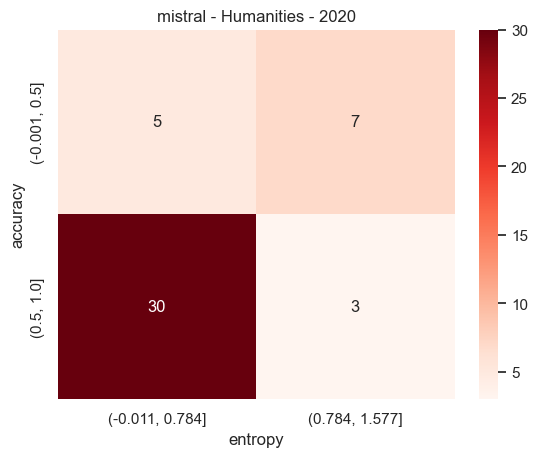

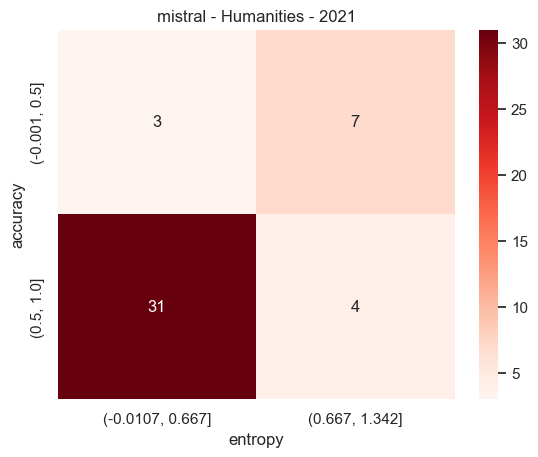

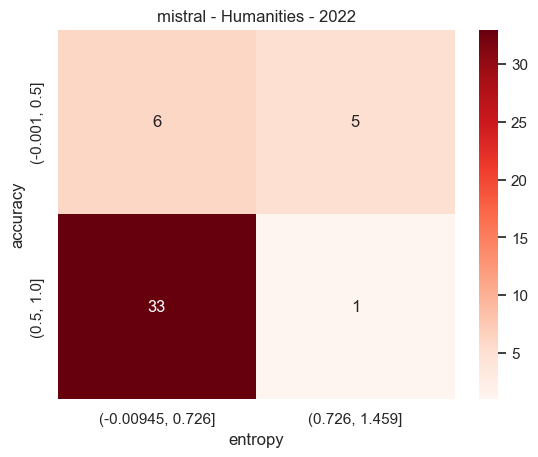

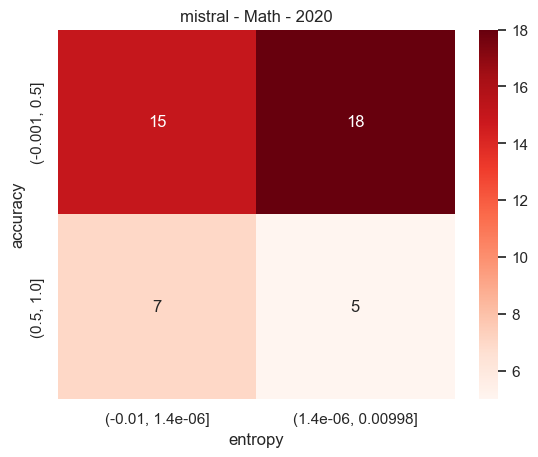

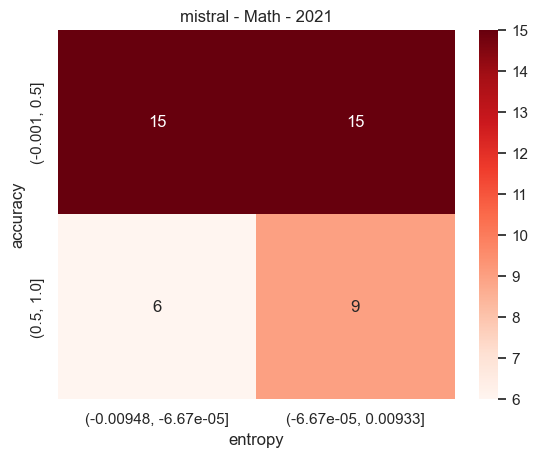

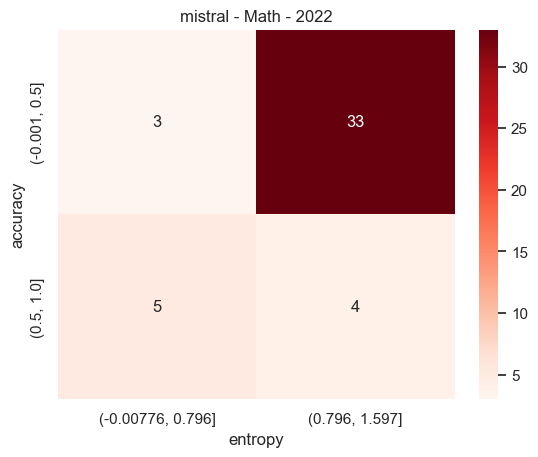

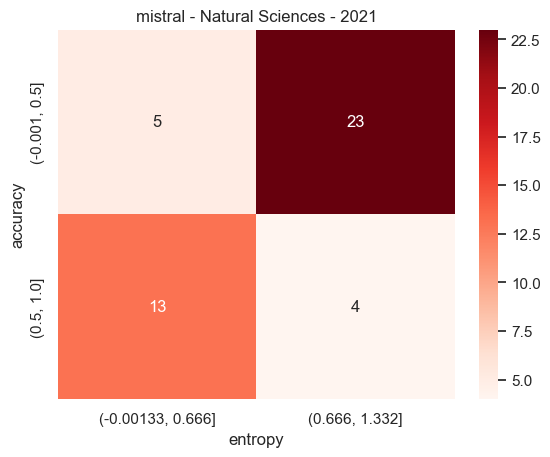

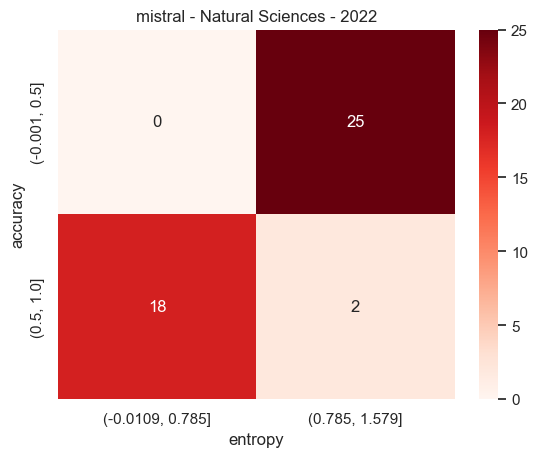

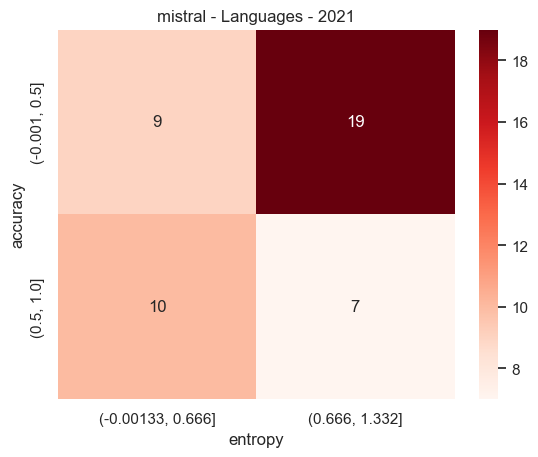

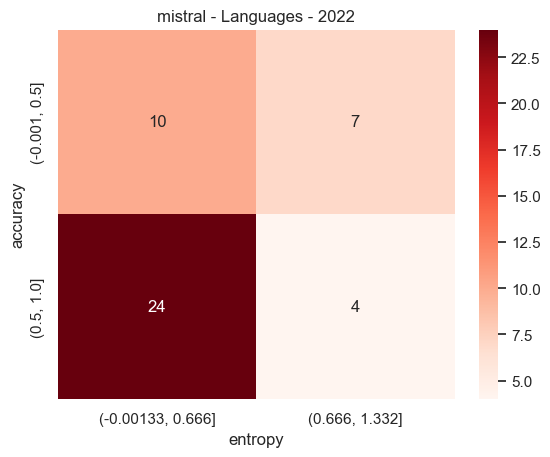

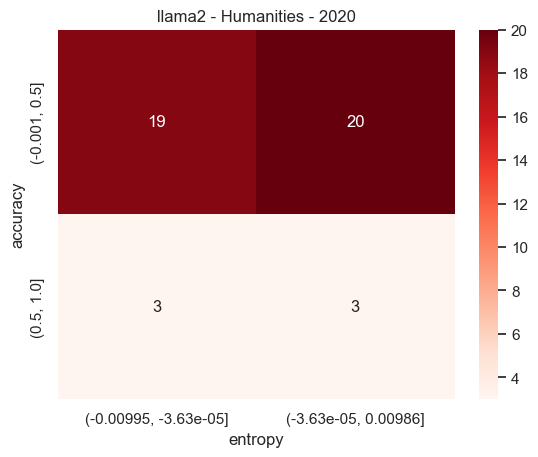

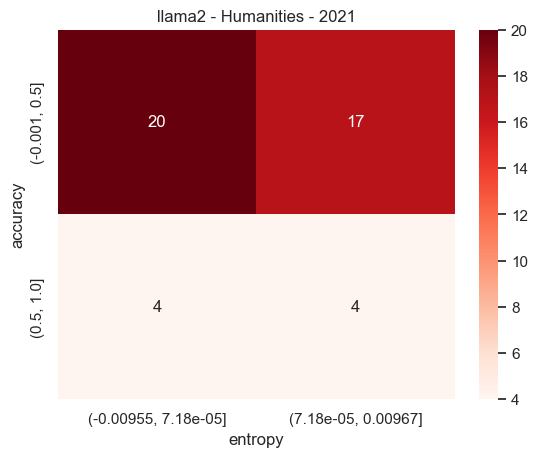

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        for year in sorted(dic_itens[llm][exam].keys()):
            # Create a sample DataFrame
            data = {'accuracy': dic_itens[llm][exam][year]['accuracy'],
            'entropy': dic_itens[llm][exam][year]['entropy_original_order']}

            df = pd.DataFrame(data)

            # Create bins for columns A and B
            bins_A = pd.cut(df['accuracy'], bins=2)
            bins_B = pd.cut(df['entropy'], bins=2)

            # Create a contingency table (cross-tabulation)
            ct = pd.crosstab(bins_A, bins_B)

            # Create a heatmap
            sns.heatmap(ct, annot=True, cmap='Reds', fmt='d')
    
            # Show the plot
            plt.title(f"{llm} - {dic_exam_to_paper_name[exam]} - {year}")
            plt.show()


In [9]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

baseline_entropy = entropy([0.2, 0.2, 0.2, 0.2, 0.2])
print(baseline_entropy)

for llm in ['mistral']:
    for exam in dic_itens[llm].keys():
        for year in dic_itens[llm][exam].keys():
            sns.scatterplot(x=dic_itens[llm][exam][year]['entropy_shuffled_order'], y=dic_itens[llm][exam][year]['entropy_original_order'])
            plt.title(f"entropy shuffled vs original - Mistral {exam} {year}")
            plt.show()
            plt.savefig(f'figures/dist-{exam}-{year}-scatter-entropy.pdf', format='pdf',bbox_inches='tight')





1.6094379124341005


In [10]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

baseline_entropy = entropy([0.2, 0.2, 0.2, 0.2, 0.2])
print(baseline_entropy)

for llm in ['mistral']:
    for exam in dic_itens[llm].keys():
        for year in dic_itens[llm][exam].keys():
            sns.scatterplot(x=dic_itens[llm][exam][year]['entropy_original_order'], y=dic_itens[llm][exam][year]['accuracy'])
            plt.title(f"entropy original vs accuracy - Mistral {exam} {year}")
            plt.show()
            plt.savefig(f'figures/dist-{exam}-{year}-scatter-entropy.pdf', format='pdf',bbox_inches='tight')





1.6094379124341005


In [11]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

baseline_entropy = entropy([0.2, 0.2, 0.2, 0.2, 0.2])
print(baseline_entropy)

for llm in ['mistral']:
    for exam in dic_itens[llm].keys():
        for year in dic_itens[llm][exam].keys():
            sns.scatterplot(x=dic_itens[llm][exam][year]['entropy_original_order'], y=dic_itens[llm][exam][year]['accuracy'])
            plt.title(f"entropy shuffled vs accuracy - Mistral {exam} {year}")
            plt.show()
            plt.savefig(f'figures/dist-{exam}-{year}-scatter-entropy.pdf', format='pdf',bbox_inches='tight')





1.6094379124341005


In [12]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

baseline_entropy = entropy([0.2, 0.2, 0.2, 0.2, 0.2])
print(baseline_entropy)

for exam in ['CH', 'MT']:
    for year in [2020, 2021, 2022]:
        sns.scatterplot(x=dic_itens['mistral'][exam][year]['human_accuracy_75_100'], y=dic_itens['mistral'][exam][year]['accuracy'])
        plt.title(f"human accuracy vs llm accuracy - Mistral {exam} {year}")
        plt.show()
        plt.savefig(f'figures/dist-{exam}-{year}-accuracy.pdf', format='pdf',bbox_inches='tight')





1.6094379124341005


KeyError: 2020

In [ ]:
# COMPARACAO ENTROPIA PARA CH
import matplotlib.pyplot as plt
import seaborn as sns

for exam in ['CH', 'MT', 'CN', 'LC']:
    curves = {}
    for year in dic_logs['mistral'][exam].keys():
        curves[f'mistral-{exam}-{year}'] = dic_logs['mistral'][exam][year]['elapsed_time']
    
    g = sns.kdeplot(
        curves,
        bw_adjust=0.2,
        common_norm=False,  # Normalize each distribution independently
        palette=palette,  # Use palette for multiple colors
    )
    plt.xlabel("Elapsed item per item (sec)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.show()
    plt.savefig(f'figures/dist-{exam}-elapsed-time.pdf', format='pdf',bbox_inches='tight')




In [ ]:
# Create the 'BIAS' column based on the condition
import numpy as np
from IPython.display import display
import pandas as pd


for llm in ['mistral']:
    for exam in dic_itens[llm].keys():
        for year in dic_itens[llm][exam].keys():
            print(llm, exam, year)
            average_entropy =  dic_itens[llm][exam][year]['entropy_original_order'].mean()

            print(average_entropy)
    
            dic_itens[llm][exam][year]['BIAS'] = np.where(dic_itens[llm][exam][year]['accuracy'] > 0.2, 'low', 'high')
            dic_itens[llm][exam][year]['VARIANCE'] = np.where(dic_itens[llm][exam][year]['entropy_original_order'] > average_entropy, 'high', 'low')

            ct = pd.crosstab(dic_itens[llm][exam][year].BIAS, dic_itens[llm][exam][year].VARIANCE)
            ct = ct.reindex(['low', 'high'], axis="columns").reindex(['low', 'high'], axis="rows")
            display(ct)





In [ ]:
# How classical test theory scores are different?
import matplotlib.pyplot as plt
import seaborn as sns

subjects = {}

for irt_param in ['A', 'B', 'C']:
    for llm in ['mistral']:
        for exam in dic_itens[llm].keys():
            for year in dic_itens[llm][exam].keys():
                df = dic_itens[llm][exam][year]
                subjects['low-variance'] = df[(df['BIAS'] != 'aaa') & (df['VARIANCE'] == 'low')]['NU_PARAM_'+irt_param]
                subjects['high-variance'] = df[(df['BIAS'] != 'aaa') & (df['VARIANCE'] == 'high')]['NU_PARAM_'+irt_param]
                subjects['all'] = df['NU_PARAM_'+irt_param]

                g = sns.ecdfplot(
                    subjects,
                    #kind="kde",
                    #common_norm=False,  # Normalize each distribution independently
                    palette=["blue", "red", "black"],  # Use palette for multiple colors
                )
                plt.title(f"{llm} - {exam} - {year}")
                plt.xlabel(f"IRT param {irt_param}", fontsize=14)
                plt.ylabel("P (X > x)", fontsize=14)
                plt.show()

                plt.savefig(f'figures/bias-variance-irt.pdf', format='pdf',bbox_inches='tight')



In [ ]:
from scipy.stats import spearmanr

merged_df = pd.merge(human_itens_df, llm_itens_dfs[0], on='CO_POSICAO')

columns_pair1 = ['A', 'B', 'C', 'D', 'E']
columns_pair2 =  ['A', 'B', 'C', 'D', 'E']

merged_df['correlation'] = merged_df.apply(lambda row: spearmanr([row['A'], row['B'], row['C'], row['D'], row['E']], [row['A_original_order'], row['B_original_order'], row['C_original_order'], row['D_original_order'], row['E_original_order']])[0], axis=1)
merged_df[['A','B', 'C', 'D', 'E', 'A_original_order','B_original_order', 'C_original_order', 'D_original_order', 'E_original_order', 'correlation', 'accuracy_y']].sort_values(by='accuracy_y', ascending=False).head(45)

#merged_df.plot.scatter(x='correlation', y='accuracy_y', title='Scatter Plot')


In [ ]:
merged_df = pd.merge(human_correct_df, correct_dfs[1], on='item_id', how='inner',  suffixes=('_'+theta_names[0], '_' + theta_names[1]) )

merged_df = merged_df.sort_values(by=['CORRECT_humans'])

merged_df.plot(x='item_id', y=['CORRECT_humans', 'CORRECT_'+theta_names[1]], kind='bar', legend=True)
plt.xlabel('CTT SCORE')
plt.ylabel('Mean IRT SCORE')
plt.title(f'Average IRT score per CTT score')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_graphs(choices_df, names_df, title):

    options = ['A','B','C','D','E']

    for (idx1, choices_df_0_row), (idx2, choices_df_1_row) in zip(choices_df[0].iterrows(), choices_df[1].iterrows()):

        # Set up the figure and axes
        fig, ax = plt.subplots()

        # Set the width of the bars
        bar_width = 0.35

        indices = np.arange(len(options))

        # Plot bars for data1
        ax.bar(indices - bar_width/2, choices_df_0_row[options], bar_width, label=names_df[0])

        # Plot bars for data2
        ax.bar(indices + bar_width/2, choices_df_1_row[options], bar_width, label=names_df[1])
    
        # Set labels and title
        ax.set_xlabel('Options')
        ax.set_ylabel('%')
        ax.set_title(f"Item {idx1+1} - {choices_df_0_row['CORRECT_OPTION']}")
        ax.set_xticks(indices)
        ax.set_xticklabels(options)

        # Display legend
        ax.legend()

        # Show the plot
        plt.show()
        plt.subplots_adjust(bottom=0.1)
        #plt.savefig(f'item{idx1+1}.pdf', format='pdf',bbox_inches='tight')



In [ ]:
plot_graphs(original_choice_dfs, theta_names, 'titulo')

In [ ]:
import pandas as pd

roc_curva_correct_dfsch_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_llms/files_CH_mistral_bits_4_VALID/responses/test_responses_llms_CH.csv")
roc_curva_mt_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_llms/files_MT_mistral_bits_4_VALID/responses/test_responses_llms_MT.csv")
roc_curva_cn_df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_llms/files_CN_mistral_bits_4_VALID/responses/test_responses_llms_CN.csv")


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.lineplot(x=roc_curva_ch_df['VALID_OPTION_COUNT'], y=roc_curva_ch_df['CTT_SCORE'], label='Humanities', marker='o')
sns.lineplot(x=roc_curva_mt_df['VALID_OPTION_COUNT'], y=roc_curva_mt_df['CTT_SCORE'], label='Math', marker='o')
sns.lineplot(x=roc_curva_cn_df['VALID_OPTION_COUNT'], y=roc_curva_cn_df['CTT_SCORE'], label='Natural Sciences', marker='o', errorbar='ci')

#  BASELINE
sns.lineplot(x=roc_curva_ch_df['VALID_OPTION_COUNT'], y=roc_curva_ch_df['EXPECTED_CTT_SCORE'], label='Random', marker='o')

plt.xticks([1, 2, 3, 4, 5])
plt.show()



In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/pedro/Downloads/TRI/test_responses_humans/2022/choice_original_order/itens_CH_1062.csv")

sns.scatterplot(x=df['accuracy'], y=df['entropy'])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame df with columns 'accuracy' and 'entropy'
# Replace this with your actual DataFrame
# For example, you can read data from a CSV file using pd.read_csv('your_file.csv')
# df = pd.read_csv('your_file.csv')

# Sample data for illustration purposes
#data = {'accuracy': [0.85, 0.92, 0.78, 0.91, 0.87],
#        'entropy': [0.2, 0.1, 0.3, 0.15, 0.25]}

#df = pd.DataFrame(data)

# Create bins for accuracy
bins = np.arange(0, 1.1, 0.1)

# Add a new column 'accuracy_bin' to the DataFrame
df['accuracy_bin'] = pd.cut(df['accuracy'], bins, labels=False)

# Group by 'accuracy_bin' and calculate the average entropy for each bin
average_entropy = df.groupby('accuracy_bin')['entropy'].mean()

# Plot the data
plt.bar(average_entropy.index, average_entropy, width=0.1, align='center')
plt.xlabel('Accuracy Bins')
plt.ylabel('Average Entropy')
plt.title('Average Entropy vs Accuracy Bins')
plt.show()


In [ ]:
from scipy.stats import entropy

array = [0.2, 0.2, 0.2, 0.2]

print(entropy(array))

In [ ]:
real_random_item_df = pd.read_csv(f"{filepath}/files_MT_mistral_bits_4_count_30_RANDOM/responses/random_samples.csv")
random_item_df = pd.read_csv(f"{filepath}/files_MT_mistral_bits_4_count_30_RANDOM/responses/samples.csv")
non_random_item_df =  pd.read_csv(f"{filepath}/files_MT_mistral_bits_4_count_10_NON_RANDOM/responses/samples.csv")

subjects = { }
subjects['full_random_model'] = real_random_item_df['CTT_SCORE']
subjects['real_exam'] = non_random_item_df['CTT_SCORE']
subjects['random_numbers_in_X'] = random_item_df['CTT_SCORE']


g = sns.displot(
    subjects,
    kind="kde",
    common_norm=False,  # Normalize each distribution independently
    palette=["red", "blue", "green"],  # Use palette for multiple colors
)
plt.xlabel("Classical Test Theory Score", fontsize=14)
plt.ylabel("Density", fontsize=14)

plt.savefig(f'figures/random-number-baseline-math.pdf', format='pdf',bbox_inches='tight')

In [ ]:
        import numpy as np
        # Set up the figure and axes
        fig, ax = plt.subplots()

        # Set the width of the bars
        bar_width = 0.35

        options = ['A', 'B', 'C', 'D', 'E']
        indices = np.arange(len(options))

        choices_df_0_row = human_itens_ch_2022_df[0]

        # Plot bars for data1
        ax.bar(indices - bar_width/2, choices_df_0_row[options], bar_width, label=names_df[0])

        # Plot bars for data2
        ax.bar(indices + bar_width/2, choices_df_1_row[options], bar_width, label=names_df[1])
    
        # Set labels and title
        ax.set_xlabel('Options')
        ax.set_ylabel('%')
        ax.set_title(f"Item {idx1+1} - {choices_df_0_row['CORRECT_OPTION']}")
        ax.set_xticks(indices)
        ax.set_xticklabels(options)

        # Display legend
        ax.legend()

        # Show the plot
        plt.show()
        plt.subplots_adjust(bottom=0.1)
        #plt.savefig(f'item{idx1+1}.pdf', format='pdf',bbox_inches='tight')

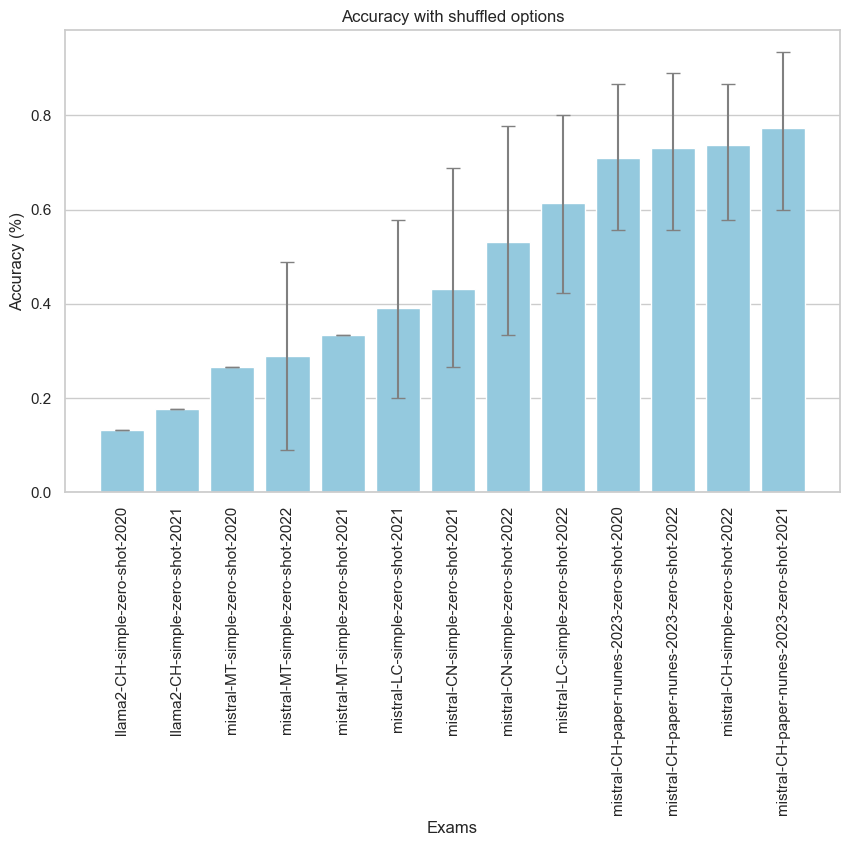

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

exams = []
accuracy_mean = []
accuracy_min = []
accuracy_max = []
for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        for prompt in dic_scores[llm][exam].keys():
            for year in dic_scores[llm][exam][prompt].keys():
                exams.append(f"{llm}-{exam}-{prompt}-{year}")
                accuracy_mean.append(dic_scores[llm][exam][prompt][year]['CTT_SCORE'].mean() / 45)
                accuracy_min.append(dic_scores[llm][exam][prompt][year]['CTT_SCORE'].min() / 45)
                accuracy_max.append(dic_scores[llm][exam][prompt][year]['CTT_SCORE'].max() / 45)

sorted_indices = sorted(range(len(accuracy_mean)), key=lambda k: accuracy_mean[k])


data = pd.DataFrame({
    'Exams': [exams[i] for i in sorted_indices],
    'Accuracy_Mean': [accuracy_mean[i] for i in sorted_indices],
    'Accuracy_Min': [accuracy_min[i] for i in sorted_indices],
    'Accuracy_Max': [accuracy_max[i] for i in sorted_indices]
})

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot with error bars
sns.barplot(x='Exams', y='Accuracy_Mean', data=data, errorbar=None, color='skyblue')
plt.errorbar(x=data['Exams'], y=data['Accuracy_Mean'], 
             yerr=[data['Accuracy_Mean'] - data['Accuracy_Min'], data['Accuracy_Max'] - data['Accuracy_Mean']],
             fmt='none', ecolor='gray', capsize=5)

plt.title('Accuracy with shuffled options')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.savefig(f'figures/variance-analysis/ctt-variance-all.pdf', format='pdf',bbox_inches='tight')
plt.show()


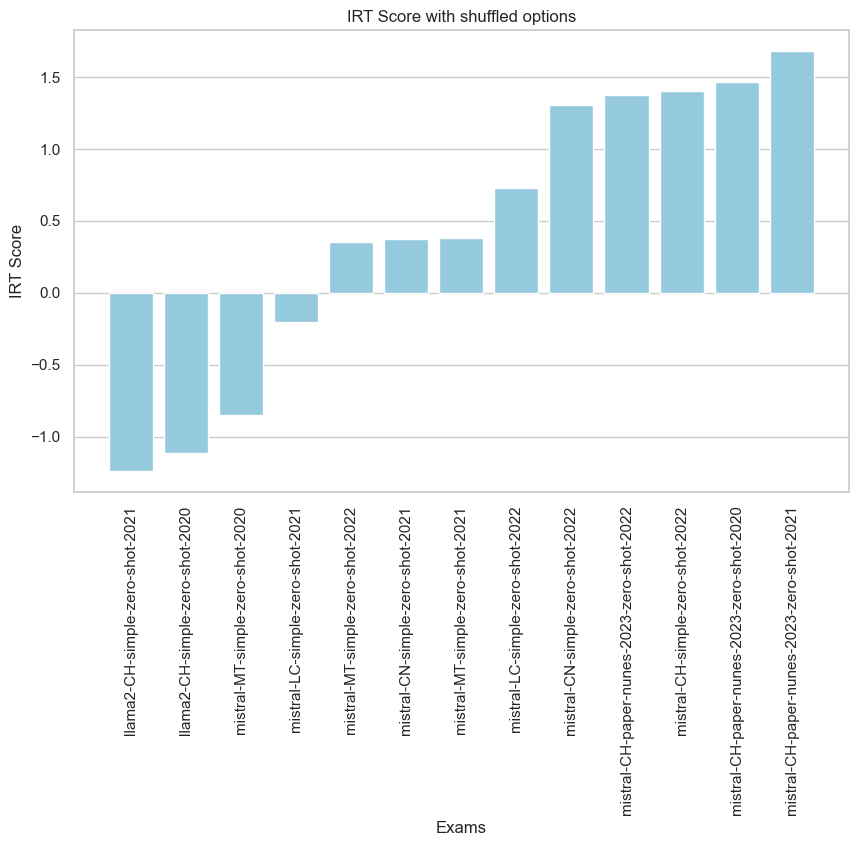

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

exams = []
accuracy_mean = []
accuracy_min = []
accuracy_max = []
for llm in ['mistral', 'llama2']:
    for exam in dic_scores[llm].keys():
        for prompt in dic_scores[llm][exam].keys():
            for year in dic_scores[llm][exam][prompt].keys():
                exams.append(f"{llm}-{exam}-{prompt}-{year}")
                accuracy_mean.append(dic_scores[llm][exam][prompt][year]['IRT_SCORE'].mean())
                accuracy_min.append(dic_scores[llm][exam][prompt][year]['IRT_SCORE'].min())
                accuracy_max.append(dic_scores[llm][exam][prompt][year]['IRT_SCORE'].max())

sorted_indices = sorted(range(len(accuracy_mean)), key=lambda k: accuracy_mean[k])


data = pd.DataFrame({
    'Exams': [exams[i] for i in sorted_indices],
    'Accuracy_Mean': [accuracy_mean[i] for i in sorted_indices],
    'Accuracy_Min': [accuracy_min[i] for i in sorted_indices],
    'Accuracy_Max': [accuracy_max[i] for i in sorted_indices]
})

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot with error bars
sns.barplot(x='Exams', y='Accuracy_Mean', data=data, errorbar=None, color='skyblue')
plt.errorbar(x=data['Exams'], y=data['Accuracy_Mean'], 
             #yerr=[data['Accuracy_Mean'] - data['Accuracy_Min'], data['Accuracy_Max'] - data['Accuracy_Mean']],
             fmt='none', ecolor='gray', capsize=5)

plt.title('IRT Score with shuffled options')
plt.ylabel('IRT Score')
plt.xticks(rotation=90)
plt.savefig(f'figures/variance-analysis/irt-variance-all.pdf', format='pdf',bbox_inches='tight')
plt.show()
